# Week 2 Regression assignment.

 Meghanjali Chennupati (U30308400)

 This is the first notebook . In this notebook I will increase the noise and see how my model is fitting the data

# Predictive Modeling Example

## Step 1: Import a number of libraries that we expect to use

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2:  Define a hidden linear relationship/model

First let's define our relationship (normally, this is hidden, but since we are creating the data, we will need to identify this)

In [41]:
b0 = 0  # y intercept
b1 = -1 # slope for x1
b2 = 1 # slope for x2

## Step 3: Create input and output data using the model

Let's set the number of observations that we will synthesize...

In [42]:
sample_size = 1000

In [43]:
x1_mean = 0
x1_stdev = 10
x1 = np.round(np.random.normal(x1_mean, x1_stdev, sample_size),2)

x2_mean = 0
x2_stdev = 10
x2 = np.round(np.random.normal(x2_mean, x2_stdev, sample_size),2)

Once we have the X values (input), we can generate y values using our 'hidden' model...

In [44]:
y = b0 + b1*x1 + b2*x2

But, this is rather boring data to analyze, because the 'hidden' model is not really hidden at all...

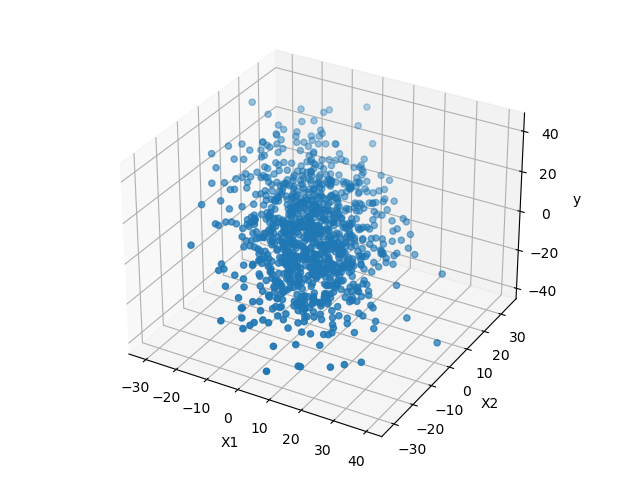

In [45]:
# this is a notebook 'MAGIC' that will allow for creation of interactive plot
%matplotlib widget 

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, y)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

%matplotlib inline

## Step 4: Add some random noise to 'hide' the model

Now, let's obscure the model by adding noise to the data by adding errors that are randomly selected from a norma distribution

In [46]:
e_mean = 50
e_stdev = 80
e = np.round(np.random.normal(e_mean, e_stdev, sample_size), 2) # round to two decimal places
y = y + e

## Step 5: Explore the resulting synthesized data

Now, let's look at a scatter plot of both the X and y data with the noise added in...

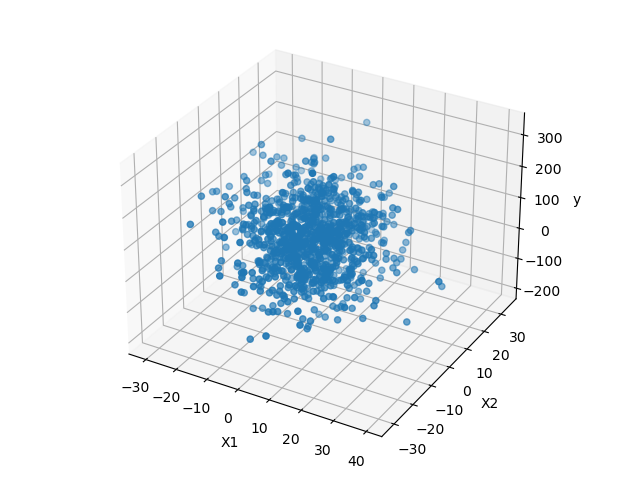

In [47]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, y)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

### Step 6: Create a pandas data frame from the data

Since our goal is to generate data that we can analyze with another notebook (for practice), let's save this data to a csv. 

First we will create a dataframe with the data we just similated...

In [48]:
df = pd.DataFrame({'x1': x1, 'x2' : x2, 'target': y})
df

,x1,x2,target
0,16.24,-1.53,71.39
1,-6.12,-24.33,50.89
2,-5.28,5.08,24.51
3,-10.73,-3.24,8.63
4,8.65,-15.11,-136.16
...,...,...,...
995,-1.16,1.89,-8.70
996,-22.77,5.61,28.57
997,-0.70,-9.22,29.43
998,3.54,6.47,-59.07


## Step 7: Save the data frame contents to a csv

Lastly, let's save the data we created to a csv file. This saved data will be used to practice finding hidden relationships in data.

In [49]:
df.to_csv(r'C:/Users/Meghanjali/Desktop/Data science programming/data/Week2/noise_c02_dataset_2.csv', index=False)

## Step 1: Import the libraries we will use in this notebook

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(1) # set this to ensure the results are repeatable. 

%matplotlib widget 

## Step 2: Load the given data that we will model

In [51]:
df = pd.read_csv(r'C:/Users/Meghanjali/Desktop/Data science programming/data/Week2/noise_c02_dataset_2.csv')

df.head(3)

,x1,x2,target
0,16.24,-1.53,71.39
1,-6.12,-24.33,50.89
2,-5.28,5.08,24.51


# Seperate out the input m(X) and the target (y)

In [52]:
X = df[['x1', 'x2']]
y = df[['target']]

For educational purposes, let's look at the first five values in X and y (note how X is an array of lists)

## Step 3: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

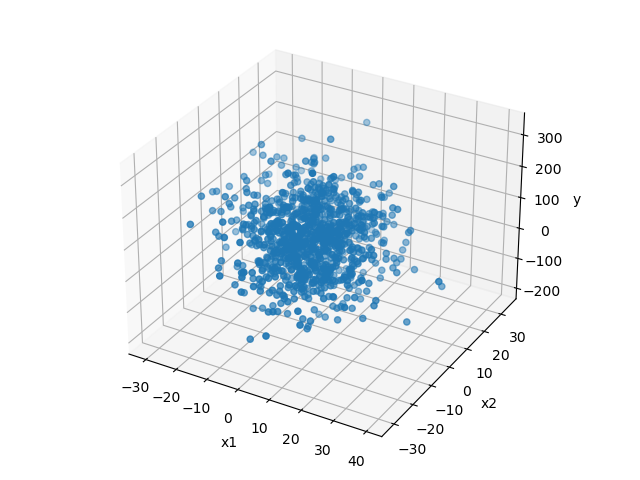

In [53]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['x1'], df['x2'], y)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

## Step 4: Fit the model

Fit the linear regression model to the dataset

In [54]:
lin_reg = LinearRegression().fit(X,y)

## Step 5: Analyze the linear regression model's performance

Visualize the linear regression model results

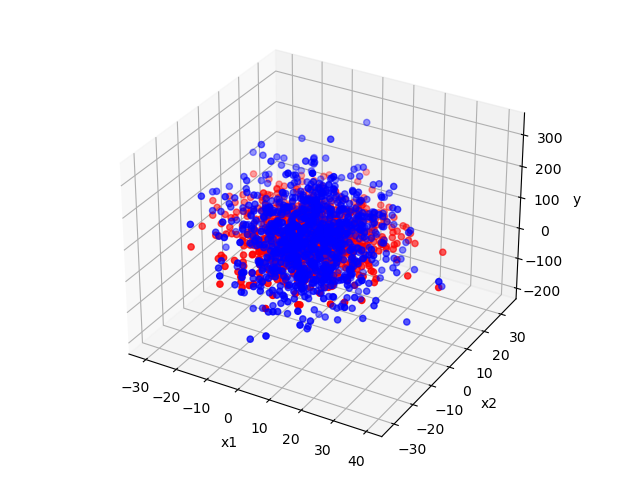

In [55]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X['x1'], X['x2'], y, color='blue')
ax.scatter(X['x1'], X['x2'], lin_reg.predict(X), color='red')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

In [56]:
b0 = lin_reg.intercept_[0]
b1 = lin_reg.coef_[0][0]
b2 = lin_reg.coef_[0][1]
r2 = lin_reg.score(X, y)

print(f"Y = {b0:.2f} + {b1:.2f}x1 + {b2:.2f}x2")
print(f"R^2: {r2:.3f}")

Y = 48.44 + -1.40x1 + 0.77x2
R^2: 0.039


# Analysis:
1. I added the noise of mean value of 50 and standard deviation of 80.
2. So when i tried to run my model If we observe the plot its quite ok.
3. It is better fitting my model when compared to old model,
4. The error also got reduced to 0.03 percent which is low than previous models error 0.68.
5. The multiple linear regression is better fittting my data and can able to find the hidden relation ship between our input variables and target.
6. Now let us observe the coeffcients b0 value is 48.44 which is more compare to -0.19(old model).
7. b1 value is -1.40 which is lower compared to 1.05.(old model)
8. b2 value is 0.77 which is lower when compared to 0.97 (old model)
9. So, the slope is high and coffcients of x1 and x2 b1,b2 are lower the model is able to fit better between inputs and target y.
10. The R^2 error is less so this is better model for the new data generated.